## Compare the data against 3 other states. Normalize by population, use a normalization factor which is able to identify cases, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?


In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
#I have selected the Albama,Newjersey,Florida and NorthCarolina states for analysis.
selected_state_AL = "AL"
selected_state_NJ = "NJ"
selected_state_MD = "MD"
selected_state_NC = "NC"
#reading the confirmed data
cases = pd.read_csv("../data/covid_confirmed_usafacts.csv")
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19205,19205,19205,19205,19205,19318,19318,19318,19318,19318
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,68182,68182,68182,68182,68182,68518,68518,68518,68518,68518
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7120,7120,7120,7120,7120,7188,7188,7188,7188,7188
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,7808,7808,7808,7808,7808,7855,7855,7855,7855,7855


In [3]:
# using the melt function so that we get the all the dates in one column.
cases_transpose = pd.melt(frame = cases, id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name=["Date"],value_name='Number of Cases')
cases_transpose = cases_transpose[cases_transpose['countyFIPS'] != 0]
cases_transpose.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [4]:
#Filtering the data for Albama State.
cases_selected_state = cases_transpose[cases_transpose["State"] == selected_state_AL]
cases_selected_state.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [5]:
#For the selected state Albama summing the cases per day of all the counties.
cases_selected_state_daily = cases_selected_state.groupby('Date')['Number of Cases'].sum()
cases_selected_state_daily.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Cases, dtype: int64

In [6]:
#Finding out the new cases per day.
new_cases_selected_state_daily = cases_selected_state_daily.diff().reset_index()
new_cases_selected_state_daily.head()

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [7]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_cases_mean_selected_state = new_cases_selected_state_daily.copy()
weekly_cases_mean_selected_state['Date'] = pd.to_datetime(weekly_cases_mean_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mean_selected_state = weekly_cases_mean_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].mean()
weekly_cases_mean_selected_state = weekly_cases_mean_selected_state.reset_index()
weekly_cases_mean_selected_state.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [8]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_cases_mean_selected_state_given_range = weekly_cases_mean_selected_state[(weekly_cases_mean_selected_state["Date"] >= '2022-05-29') & (weekly_cases_mean_selected_state["Date"] <= '2023-01-02')]
weekly_cases_mean_selected_state_given_range = weekly_cases_mean_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mean_selected_state_given_range['Date'] = weekly_cases_mean_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mean_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,806.857143
1,2022-06-06,1190.285714
2,2022-06-13,1374.285714
3,2022-06-20,1612.428571
4,2022-06-27,1826.142857
5,2022-07-04,2090.428571
6,2022-07-11,2378.428571
7,2022-07-18,2480.857143
8,2022-07-25,2387.428571
9,2022-08-01,1721.000000


<AxesSubplot: title={'center': 'Mean of Weekly Albama Cases'}, xlabel='Date'>

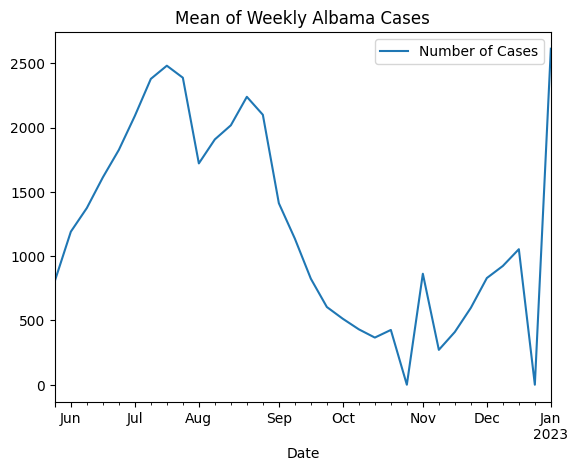

In [9]:
#Plotting the mean graph for albama state.
weekly_cases_mean_selected_state_given_range.plot(x='Date', y='Number of Cases', title = 'Mean of Weekly Albama Cases')

In [10]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_cases_median_selected_state = new_cases_selected_state_daily.copy()
weekly_cases_median_selected_state['Date'] = pd.to_datetime(weekly_cases_median_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_median_selected_state = weekly_cases_median_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].median()
weekly_cases_median_selected_state = weekly_cases_median_selected_state.reset_index()
weekly_cases_median_selected_state.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [11]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_median_selected_state_given_range = weekly_cases_median_selected_state[(weekly_cases_median_selected_state["Date"] >= '2022-05-29') & (weekly_cases_median_selected_state["Date"] <= '2023-01-02')]
weekly_cases_median_selected_state_given_range = weekly_cases_median_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_median_selected_state_given_range['Date'] = weekly_cases_median_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_median_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,971.0
1,2022-06-06,1183.0
2,2022-06-13,1625.0
3,2022-06-20,2035.0
4,2022-06-27,1926.0
5,2022-07-04,2892.0
6,2022-07-11,2699.0
7,2022-07-18,2889.0
8,2022-07-25,2685.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Median of Weekly Albama Cases'}, xlabel='Date'>

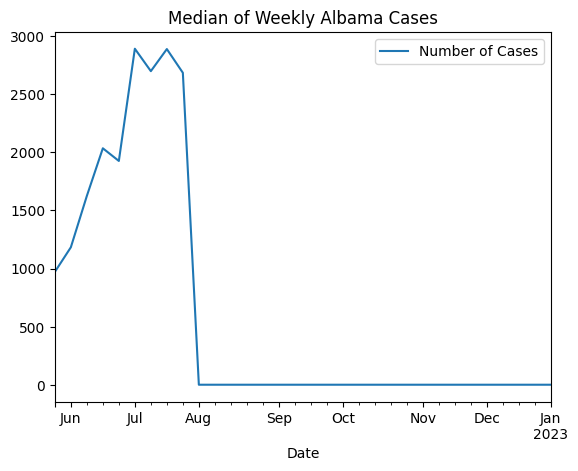

In [12]:
#Plotting the median graph
weekly_cases_median_selected_state_given_range.plot(x='Date', y='Number of Cases', title = 'Median of Weekly Albama Cases')

In [13]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_cases_mode_selected_state = new_cases_selected_state_daily.copy()
weekly_cases_mode_selected_state['Date'] = pd.to_datetime(weekly_cases_mode_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mode_selected_state = weekly_cases_mode_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].apply(statistics.mode)
weekly_cases_mode_selected_state = weekly_cases_mode_selected_state.reset_index()
weekly_cases_mode_selected_state.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [14]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mode_selected_state_given_range = weekly_cases_mode_selected_state[(weekly_cases_mode_selected_state["Date"] >= '2022-05-29') & (weekly_cases_mode_selected_state["Date"] <= '2023-01-02')]
weekly_cases_mode_selected_state_given_range = weekly_cases_mode_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mode_selected_state_given_range['Date'] = weekly_cases_mode_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mode_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,0.0
5,2022-07-04,0.0
6,2022-07-11,0.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly Albama Cases'}, xlabel='Date'>

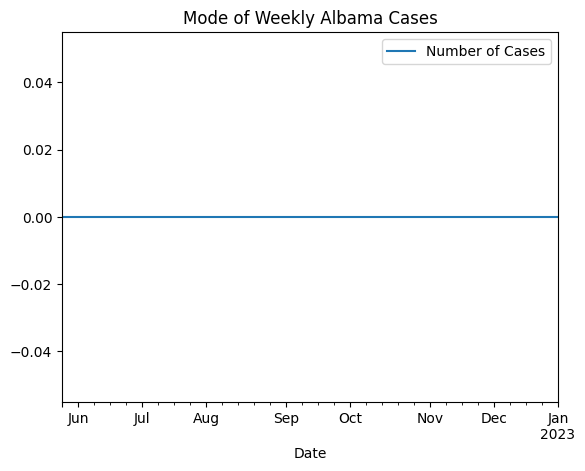

In [15]:
#Plottinf the mode graph
weekly_cases_mode_selected_state_given_range.plot(x='Date', y='Number of Cases', title = 'Mode of Weekly Albama Cases')

In [16]:
#Converting the daily to weekly analysis and finding the weekly sum of cases.
weekly_cases_sum_selected_state = new_cases_selected_state_daily.copy()
weekly_cases_sum_selected_state['Date'] = pd.to_datetime(weekly_cases_sum_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_sum_selected_state = weekly_cases_sum_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_sum_selected_state = weekly_cases_sum_selected_state.reset_index()
weekly_cases_sum_selected_state.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [17]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_cases_sum_selected_state_given_range = weekly_cases_sum_selected_state[(weekly_cases_sum_selected_state["Date"] >= '2022-05-29') & (weekly_cases_sum_selected_state["Date"] <= '2023-01-02')]
weekly_cases_sum_selected_state_given_range = weekly_cases_sum_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_sum_selected_state_given_range['Date'] = weekly_cases_sum_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_sum_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,5648.0
1,2022-06-06,8332.0
2,2022-06-13,9620.0
3,2022-06-20,11287.0
4,2022-06-27,12783.0
5,2022-07-04,14633.0
6,2022-07-11,16649.0
7,2022-07-18,17366.0
8,2022-07-25,16712.0
9,2022-08-01,12047.0


<AxesSubplot: title={'center': 'Cases of Weekly Albama Cases'}, xlabel='Date'>

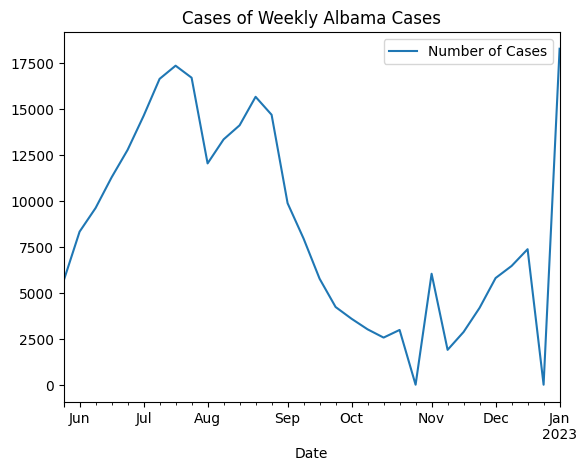

In [18]:
weekly_cases_sum_selected_state_given_range.plot(x='Date', y='Number of Cases', title = 'Cases of Weekly Albama Cases')

### Week starting 2022-07-18 has a peak of cases in alabama state. As 4th of july was independence day so the cases got increase for the month of july.

In [19]:
#reading the population data
population = pd.read_csv("../data/covid_county_population_usafacts.csv")
population.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [20]:
#Filtering the population for albama state
population_selected_state = population[population["State"] == selected_state_AL]
population_selected_state

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
63,1125,Tuscaloosa County,AL,209355
64,1127,Walker County,AL,63521
65,1129,Washington County,AL,16326
66,1131,Wilcox County,AL,10373


In [21]:
#For the Albama state summing the population.
population_selected_state = population_selected_state.groupby('State')['population'].sum()
population_selected_state

State
AL    4903185
Name: population, dtype: int64

In [22]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_cases_sum_selected_state_given_range = weekly_cases_sum_selected_state_given_range.copy()
normalized_weekly_cases_sum_selected_state_given_range['Number of Cases'] = normalized_weekly_cases_sum_selected_state_given_range['Number of Cases'].mul(10000)
normalized_weekly_cases_sum_selected_state_given_range['Number of Cases'] = normalized_weekly_cases_sum_selected_state_given_range['Number of Cases'].div(4903185)
normalized_weekly_cases_sum_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,11.519043
1,2022-06-06,16.993036
2,2022-06-13,19.619900
3,2022-06-20,23.019731
4,2022-06-27,26.070809
5,2022-07-04,29.843867
6,2022-07-11,33.955480
7,2022-07-18,35.417795
8,2022-07-25,34.083968
9,2022-08-01,24.569744


<AxesSubplot: title={'center': 'Normalized plot of Weekly Albama Cases'}, xlabel='Date'>

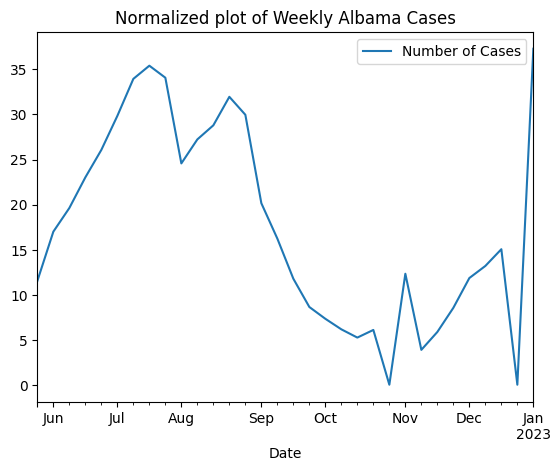

In [23]:
normalized_weekly_cases_sum_selected_state_given_range.plot(x='Date', y='Number of Cases', title = 'Normalized plot of Weekly Albama Cases')

In [24]:
cases_selected_state_NJ = cases_transpose[cases_transpose["State"] == selected_state_NJ].reset_index()
del cases_selected_state_NJ[cases_selected_state_NJ.columns[0]]
cases_selected_state_NJ.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
0,34001,Atlantic County,NJ,34,2020-01-22,0
1,34003,Bergen County,NJ,34,2020-01-22,0
2,34005,Burlington County,NJ,34,2020-01-22,0
3,34007,Camden County,NJ,34,2020-01-22,0
4,34009,Cape May County,NJ,34,2020-01-22,0


In [25]:
#For the selected state Albama summing the cases per day of all the counties.
cases_selected_state_daily_NJ = cases_selected_state_NJ.groupby('Date')['Number of Cases'].sum()
cases_selected_state_daily_NJ.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Cases, dtype: int64

In [26]:
#Finding out the new cases per day.
new_cases_selected_state_daily_NJ = cases_selected_state_daily_NJ.diff().reset_index()
new_cases_selected_state_daily_NJ.head()

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [27]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_cases_mean_selected_state_NJ = new_cases_selected_state_daily_NJ.copy()
weekly_cases_mean_selected_state_NJ['Date'] = pd.to_datetime(weekly_cases_mean_selected_state_NJ['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mean_selected_state_NJ = weekly_cases_mean_selected_state_NJ.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].mean()
weekly_cases_mean_selected_state_NJ = weekly_cases_mean_selected_state_NJ.reset_index()
weekly_cases_mean_selected_state_NJ.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [28]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mean_selected_state_given_range_NJ = weekly_cases_mean_selected_state_NJ[(weekly_cases_mean_selected_state_NJ["Date"] >= '2022-05-29') & (weekly_cases_mean_selected_state_NJ["Date"] <= '2023-01-02')]
weekly_cases_mean_selected_state_given_range_NJ = weekly_cases_mean_selected_state_given_range_NJ.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mean_selected_state_given_range_NJ['Date'] = weekly_cases_mean_selected_state_given_range_NJ['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mean_selected_state_given_range_NJ

,Date,Number of Cases
0,2022-05-30,3105.000000
1,2022-06-06,3634.714286
2,2022-06-13,3291.285714
3,2022-06-20,2762.142857
4,2022-06-27,3089.142857
5,2022-07-04,3104.571429
6,2022-07-11,3560.571429
7,2022-07-18,2464.714286
8,2022-07-25,3058.285714
9,2022-08-01,4587.142857


<AxesSubplot: title={'center': 'Mean of Weekly Newjersey Cases'}, xlabel='Date'>

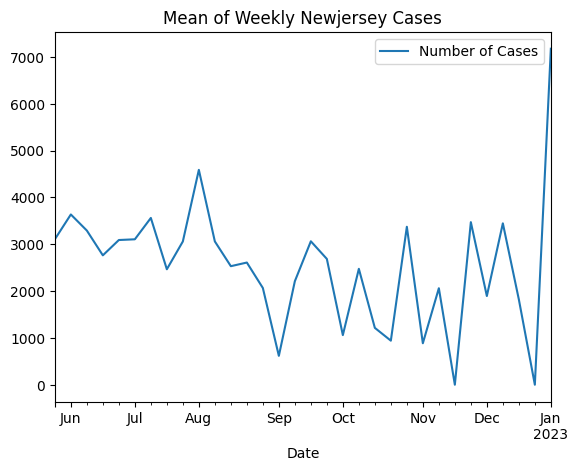

In [29]:
#Plotting the mean graph
weekly_cases_mean_selected_state_given_range_NJ.plot(x='Date', y='Number of Cases', title = 'Mean of Weekly Newjersey Cases')

In [30]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_cases_median_selected_state_NJ = new_cases_selected_state_daily_NJ.copy()
weekly_cases_median_selected_state_NJ['Date'] = pd.to_datetime(weekly_cases_median_selected_state_NJ['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_median_selected_state_NJ = weekly_cases_median_selected_state_NJ.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].median()
weekly_cases_median_selected_state_NJ = weekly_cases_median_selected_state_NJ.reset_index()
weekly_cases_median_selected_state_NJ.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [31]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_median_selected_state_given_range_NJ = weekly_cases_median_selected_state_NJ[(weekly_cases_median_selected_state_NJ["Date"] >= '2022-05-29') & (weekly_cases_median_selected_state_NJ["Date"] <= '2023-01-02')]
weekly_cases_median_selected_state_given_range_NJ = weekly_cases_median_selected_state_given_range_NJ.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_median_selected_state_given_range_NJ['Date'] = weekly_cases_median_selected_state_given_range_NJ['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_median_selected_state_given_range_NJ

,Date,Number of Cases
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,3079.0
3,2022-06-20,2849.0
4,2022-06-27,3617.0
5,2022-07-04,0.0
6,2022-07-11,3965.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,3435.0


<AxesSubplot: title={'center': 'Median of Weekly Newjersey Cases'}, xlabel='Date'>

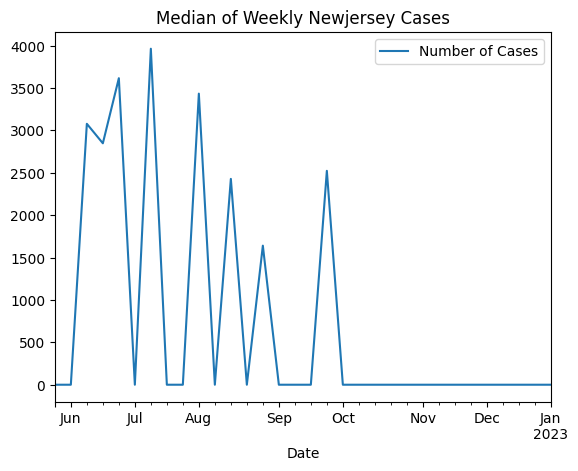

In [32]:
#Plotting the median graph
weekly_cases_median_selected_state_given_range_NJ.plot(x='Date', y='Number of Cases', title = 'Median of Weekly Newjersey Cases')

In [33]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_cases_mode_selected_state_NJ = new_cases_selected_state_daily_NJ.copy()
weekly_cases_mode_selected_state_NJ['Date'] = pd.to_datetime(weekly_cases_mode_selected_state_NJ['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mode_selected_state_NJ = weekly_cases_mode_selected_state_NJ.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].apply(statistics.mode)
weekly_cases_mode_selected_state_NJ = weekly_cases_mode_selected_state_NJ.reset_index()
weekly_cases_mode_selected_state_NJ.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [34]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mode_selected_state_given_range_NJ = weekly_cases_mode_selected_state_NJ[(weekly_cases_mode_selected_state_NJ["Date"] >= '2022-05-29') & (weekly_cases_mode_selected_state_NJ["Date"] <= '2023-01-02')]
weekly_cases_mode_selected_state_given_range_NJ = weekly_cases_mode_selected_state_given_range_NJ.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mode_selected_state_given_range_NJ['Date'] = weekly_cases_mode_selected_state_given_range_NJ['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mode_selected_state_given_range_NJ

,Date,Number of Cases
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,0.0
5,2022-07-04,0.0
6,2022-07-11,0.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly Newjersey Cases'}, xlabel='Date'>

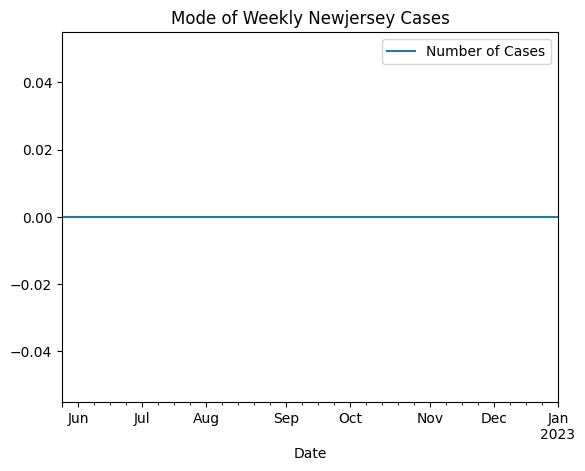

In [35]:
#Plottinf the mode graph
weekly_cases_mode_selected_state_given_range_NJ.plot(x='Date', y='Number of Cases', title = 'Mode of Weekly Newjersey Cases')

In [36]:
#Converting the daily to weekly analysis and finding the weekly sum of cases.
weekly_cases_sum_selected_state_NJ = new_cases_selected_state_daily_NJ.copy()
weekly_cases_sum_selected_state_NJ['Date'] = pd.to_datetime(weekly_cases_sum_selected_state_NJ['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_sum_selected_state_NJ = weekly_cases_sum_selected_state_NJ.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_sum_selected_state_NJ = weekly_cases_sum_selected_state_NJ.reset_index()
weekly_cases_sum_selected_state_NJ.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [37]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_cases_sum_selected_state_given_range_NJ = weekly_cases_sum_selected_state_NJ[(weekly_cases_sum_selected_state_NJ["Date"] >= '2022-05-29') & (weekly_cases_sum_selected_state["Date"] <= '2023-01-02')]
weekly_cases_sum_selected_state_given_range_NJ = weekly_cases_sum_selected_state_given_range_NJ.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_sum_selected_state_given_range_NJ['Date'] = weekly_cases_sum_selected_state_given_range_NJ['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_sum_selected_state_given_range_NJ

,Date,Number of Cases
0,2022-05-30,21735.0
1,2022-06-06,25443.0
2,2022-06-13,23039.0
3,2022-06-20,19335.0
4,2022-06-27,21624.0
5,2022-07-04,21732.0
6,2022-07-11,24924.0
7,2022-07-18,17253.0
8,2022-07-25,21408.0
9,2022-08-01,32110.0


<AxesSubplot: title={'center': 'Cases of Weekly Newjersey Cases'}, xlabel='Date'>

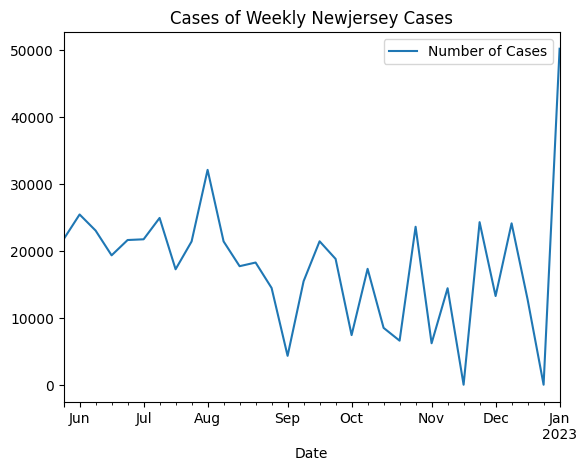

In [38]:
weekly_cases_sum_selected_state_given_range_NJ.plot(x='Date', y='Number of Cases', title = 'Cases of Weekly Newjersey Cases')

### Week starting with 2023-01-02 has a peak of cases in newjersey state with value 50212. Due to long vacation of christmas and new year the cases have incread as many people might have gathered for celebrations.

In [39]:
#Filtering the population for NEWJERSEY state
population_selected_state_NJ = population[population["State"] == selected_state_NJ].reset_index()
del population_selected_state_NJ[population_selected_state_NJ.columns[0]]
population_selected_state_NJ

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,NJ,0
1,34001,Atlantic County,NJ,263670
2,34003,Bergen County,NJ,932202
3,34005,Burlington County,NJ,445349
4,34007,Camden County,NJ,506471
5,34009,Cape May County,NJ,92039
6,34011,Cumberland County,NJ,149527
7,34013,Essex County,NJ,798975
8,34015,Gloucester County,NJ,291636
9,34017,Hudson County,NJ,672391


In [40]:
#For the Albama state summing the population.
population_selected_state_NJ = population_selected_state_NJ.groupby('State')['population'].sum()
population_selected_state_NJ

State
NJ    8882190
Name: population, dtype: int64

In [41]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_cases_sum_selected_state_given_range_NJ = weekly_cases_sum_selected_state_given_range_NJ.copy()
normalized_weekly_cases_sum_selected_state_given_range_NJ['Number of Cases'] = normalized_weekly_cases_sum_selected_state_given_range_NJ['Number of Cases'].mul(10000)
normalized_weekly_cases_sum_selected_state_given_range_NJ['Number of Cases'] = normalized_weekly_cases_sum_selected_state_given_range_NJ['Number of Cases'].div(8882190)
normalized_weekly_cases_sum_selected_state_given_range_NJ

,Date,Number of Cases
0,2022-05-30,24.470316
1,2022-06-06,28.644963
2,2022-06-13,25.938423
3,2022-06-20,21.768280
4,2022-06-27,24.345347
5,2022-07-04,24.466939
6,2022-07-11,28.060647
7,2022-07-18,19.424264
8,2022-07-25,24.102164
9,2022-08-01,36.150994


<AxesSubplot: title={'center': 'Normalized plot of Weekly Newjersey Cases'}, xlabel='Date'>

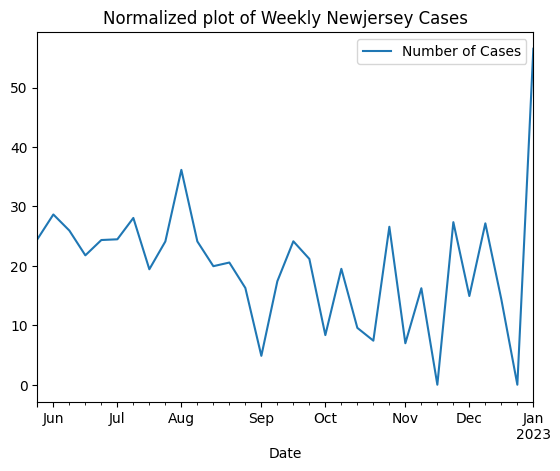

In [42]:
normalized_weekly_cases_sum_selected_state_given_range_NJ.plot(x='Date', y='Number of Cases', title = 'Normalized plot of Weekly Newjersey Cases')

In [43]:
cases_selected_state_MD = cases_transpose[cases_transpose["State"] == selected_state_MD].reset_index()
del cases_selected_state_MD[cases_selected_state_MD.columns[0]]
cases_selected_state_MD.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
0,24001,Allegany County,MD,24,2020-01-22,0
1,24003,Anne Arundel County,MD,24,2020-01-22,0
2,24005,Baltimore County,MD,24,2020-01-22,0
3,24009,Calvert County,MD,24,2020-01-22,0
4,24011,Caroline County,MD,24,2020-01-22,0


In [44]:
#For the selected state Albama summing the deaths per day of all the counties.
cases_selected_state_daily_MD = cases_selected_state_MD.groupby('Date')['Number of Cases'].sum()
cases_selected_state_daily_MD.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Cases, dtype: int64

In [45]:
#Finding out the new cases per day.
new_cases_selected_state_daily_MD = cases_selected_state_daily_MD.diff().reset_index()
new_cases_selected_state_daily_MD.head()

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [46]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_cases_mean_selected_state_MD = new_cases_selected_state_daily_MD.copy()
weekly_cases_mean_selected_state_MD['Date'] = pd.to_datetime(weekly_cases_mean_selected_state_MD['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mean_selected_state_MD = weekly_cases_mean_selected_state_MD.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].mean()
weekly_cases_mean_selected_state_MD = weekly_cases_mean_selected_state_MD.reset_index()
weekly_cases_mean_selected_state_MD.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [47]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mean_selected_state_given_range_MD = weekly_cases_mean_selected_state_MD[(weekly_cases_mean_selected_state_MD["Date"] >= '2022-05-29') & (weekly_cases_mean_selected_state_MD["Date"] <= '2023-01-02')]
weekly_cases_mean_selected_state_given_range_MD = weekly_cases_mean_selected_state_given_range_MD.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mean_selected_state_given_range_MD['Date'] = weekly_cases_mean_selected_state_given_range_MD['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mean_selected_state_given_range_MD

,Date,Number of Cases
0,2022-05-30,1782.714286
1,2022-06-06,1641.142857
2,2022-06-13,1429.428571
3,2022-06-20,1241.571429
4,2022-06-27,1461.285714
5,2022-07-04,1303.857143
6,2022-07-11,1616.714286
7,2022-07-18,1594.428571
8,2022-07-25,1640.428571
9,2022-08-01,1572.142857


<AxesSubplot: title={'center': 'Mean of Weekly Maryland Cases'}, xlabel='Date'>

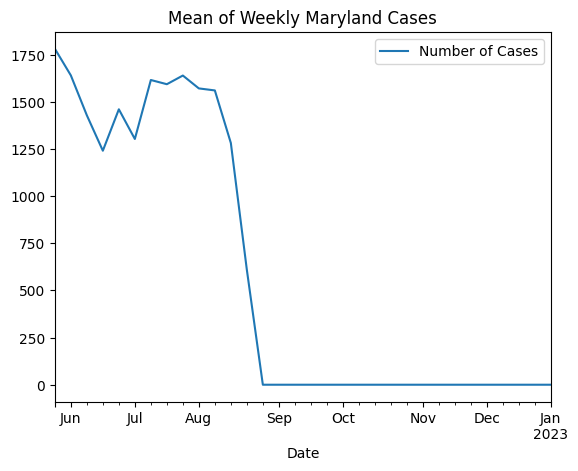

In [48]:
#Plotting the mean graph
weekly_cases_mean_selected_state_given_range_MD.plot(x='Date', y='Number of Cases', title = 'Mean of Weekly Maryland Cases')

In [49]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_cases_median_selected_state_MD = new_cases_selected_state_daily_MD.copy()
weekly_cases_median_selected_state_MD['Date'] = pd.to_datetime(weekly_cases_median_selected_state_MD['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_median_selected_state_MD = weekly_cases_median_selected_state_MD.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].median()
weekly_cases_median_selected_state_MD = weekly_cases_median_selected_state_MD.reset_index()
weekly_cases_median_selected_state_MD.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [50]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_median_selected_state_given_range_MD = weekly_cases_median_selected_state_MD[(weekly_cases_median_selected_state_MD["Date"] >= '2022-05-29') & (weekly_cases_median_selected_state_MD["Date"] <= '2023-01-02')]
weekly_cases_median_selected_state_given_range_MD = weekly_cases_median_selected_state_given_range_MD.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_median_selected_state_given_range_MD['Date'] = weekly_cases_median_selected_state_given_range_MD['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_median_selected_state_given_range_MD

,Date,Number of Cases
0,2022-05-30,0.0
1,2022-06-06,1551.0
2,2022-06-13,1633.0
3,2022-06-20,1388.0
4,2022-06-27,1634.0
5,2022-07-04,1205.0
6,2022-07-11,1780.0
7,2022-07-18,1824.0
8,2022-07-25,1859.0
9,2022-08-01,1720.0


<AxesSubplot: title={'center': 'Median of Weekly Maryland Cases'}, xlabel='Date'>

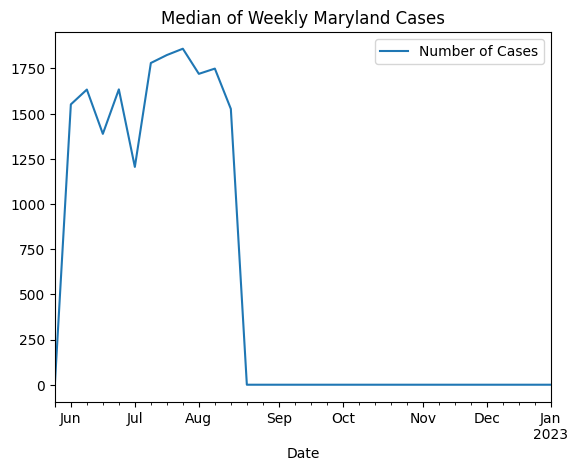

In [51]:
#Plotting the median graph
weekly_cases_median_selected_state_given_range_MD.plot(x='Date', y='Number of Cases', title = 'Median of Weekly Maryland Cases')

In [52]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_cases_mode_selected_state_MD = new_cases_selected_state_daily_MD.copy()
weekly_cases_mode_selected_state_MD['Date'] = pd.to_datetime(weekly_cases_mode_selected_state_MD['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mode_selected_state_MD = weekly_cases_mode_selected_state_MD.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].apply(statistics.mode)
weekly_cases_mode_selected_state_MD = weekly_cases_mode_selected_state_MD.reset_index()
weekly_cases_mode_selected_state_MD.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [53]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mode_selected_state_given_range_MD = weekly_cases_mode_selected_state_MD[(weekly_cases_mode_selected_state_MD["Date"] >= '2022-05-29') & (weekly_cases_mode_selected_state_MD["Date"] <= '2023-01-02')]
weekly_cases_mode_selected_state_given_range_MD = weekly_cases_mode_selected_state_given_range_MD.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mode_selected_state_given_range_MD['Date'] = weekly_cases_mode_selected_state_given_range_MD['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mode_selected_state_given_range_MD

,Date,Number of Cases
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,0.0
5,2022-07-04,0.0
6,2022-07-11,0.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly Maryland Cases'}, xlabel='Date'>

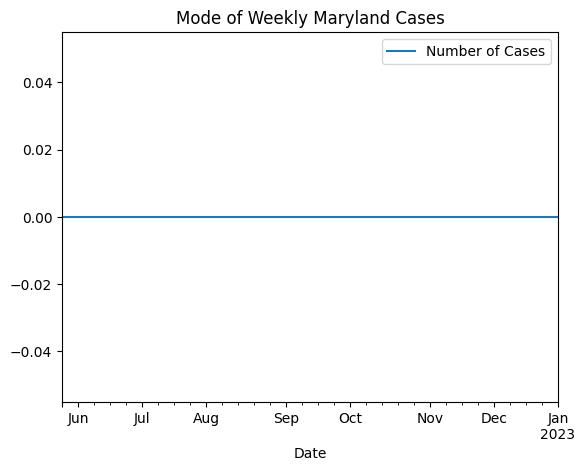

In [54]:
#Plottinf the mode graph
weekly_cases_mode_selected_state_given_range_MD.plot(x='Date', y='Number of Cases', title = 'Mode of Weekly Maryland Cases')

In [55]:
#Converting the daily to weekly analysis and finding the weekly sum of cases.
weekly_cases_sum_selected_state_MD = new_cases_selected_state_daily_MD.copy()
weekly_cases_sum_selected_state_MD['Date'] = pd.to_datetime(weekly_cases_sum_selected_state_MD['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_sum_selected_state_MD = weekly_cases_sum_selected_state_MD.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_sum_selected_state_MD = weekly_cases_sum_selected_state_MD.reset_index()
weekly_cases_sum_selected_state_MD.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [56]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_cases_sum_selected_state_given_range_MD = weekly_cases_sum_selected_state_MD[(weekly_cases_sum_selected_state_MD["Date"] >= '2022-05-29') & (weekly_cases_sum_selected_state_MD["Date"] <= '2023-01-02')]
weekly_cases_sum_selected_state_given_range_MD = weekly_cases_sum_selected_state_given_range_MD.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_sum_selected_state_given_range_MD['Date'] = weekly_cases_sum_selected_state_given_range_MD['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_sum_selected_state_given_range_MD

,Date,Number of Cases
0,2022-05-30,12479.0
1,2022-06-06,11488.0
2,2022-06-13,10006.0
3,2022-06-20,8691.0
4,2022-06-27,10229.0
5,2022-07-04,9127.0
6,2022-07-11,11317.0
7,2022-07-18,11161.0
8,2022-07-25,11483.0
9,2022-08-01,11005.0


<AxesSubplot: title={'center': 'Cases of Weekly Maryland Cases'}, xlabel='Date'>

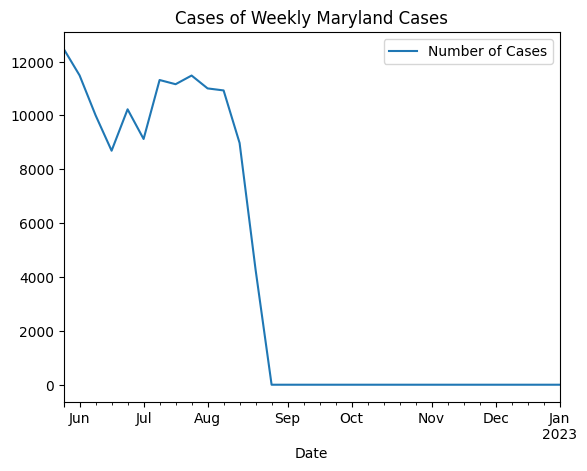

In [57]:
weekly_cases_sum_selected_state_given_range_MD.plot(x='Date', y='Number of Cases', title = 'Cases of Weekly Maryland Cases')

### Week starting with 2022-05-30 has a peak of cases in Maryland State with value 12479. As it was a holiday so is the reason it got spike in  cases.

In [58]:
#Filtering the population for maryland state
population_selected_state_MD = population[population["State"] == selected_state_MD].reset_index()
del population_selected_state_MD[population_selected_state_MD.columns[0]]
population_selected_state_MD

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,MD,0
1,24001,Allegany County,MD,70416
2,24003,Anne Arundel County,MD,579234
3,24005,Baltimore County,MD,827370
4,24009,Calvert County,MD,92525
5,24011,Caroline County,MD,33406
6,24013,Carroll County,MD,168447
7,24015,Cecil County,MD,102855
8,24017,Charles County,MD,163257
9,24019,Dorchester County,MD,31929


In [59]:
#For the Albama state summing the population.
population_selected_state_MD = population_selected_state_MD.groupby('State')['population'].sum()
population_selected_state_MD

State
MD    6045680
Name: population, dtype: int64

In [60]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_cases_sum_selected_state_given_range_MD = weekly_cases_sum_selected_state_given_range_MD.copy()
normalized_weekly_cases_sum_selected_state_given_range_MD['Number of Cases'] = normalized_weekly_cases_sum_selected_state_given_range_MD['Number of Cases'].mul(10000)
normalized_weekly_cases_sum_selected_state_given_range_MD['Number of Cases'] = normalized_weekly_cases_sum_selected_state_given_range_MD['Number of Cases'].div(6045680)
normalized_weekly_cases_sum_selected_state_given_range_MD

,Date,Number of Cases
0,2022-05-30,20.641185
1,2022-06-06,19.001998
2,2022-06-13,16.550661
3,2022-06-20,14.375554
4,2022-06-27,16.919519
5,2022-07-04,15.096730
6,2022-07-11,18.719152
7,2022-07-18,18.461116
8,2022-07-25,18.993728
9,2022-08-01,18.203081


<AxesSubplot: title={'center': 'Normalized plot of Weekly Maryland Cases'}, xlabel='Date'>

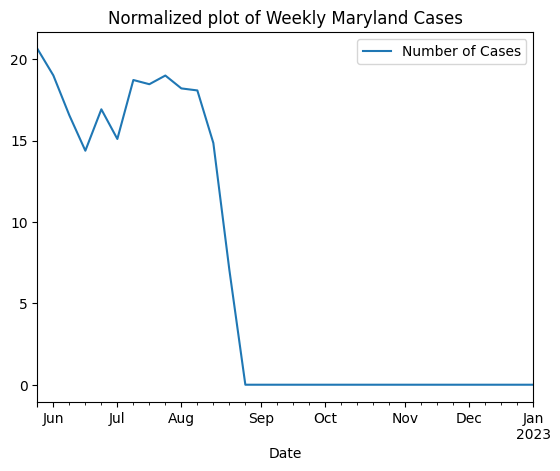

In [61]:
normalized_weekly_cases_sum_selected_state_given_range_MD.plot(x='Date', y='Number of Cases', title = 'Normalized plot of Weekly Maryland Cases')

In [62]:
cases_selected_state_NC = cases_transpose[cases_transpose["State"] == selected_state_NC].reset_index()
del cases_selected_state_NC[cases_selected_state_NC.columns[0]]
cases_selected_state_NC.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
0,37001,Alamance County,NC,37,2020-01-22,0
1,37003,Alexander County,NC,37,2020-01-22,0
2,37005,Alleghany County,NC,37,2020-01-22,0
3,37007,Anson County,NC,37,2020-01-22,0
4,37009,Ashe County,NC,37,2020-01-22,0


In [63]:
#For the selected state Albama summing the deaths per day of all the counties.
cases_selected_state_daily_NC = cases_selected_state_NC.groupby('Date')['Number of Cases'].sum()
cases_selected_state_daily_NC.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Cases, dtype: int64

In [64]:
#Finding out the new cases per day.
new_cases_selected_state_daily_NC = cases_selected_state_daily_NC.diff().reset_index()
new_cases_selected_state_daily_NC.head()

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [65]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_cases_mean_selected_state_NC = new_cases_selected_state_daily_NC.copy()
weekly_cases_mean_selected_state_NC['Date'] = pd.to_datetime(weekly_cases_mean_selected_state_NC['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mean_selected_state_NC = weekly_cases_mean_selected_state_NC.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].mean()
weekly_cases_mean_selected_state_NC = weekly_cases_mean_selected_state_NC.reset_index()
weekly_cases_mean_selected_state_NC.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [66]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mean_selected_state_given_range_NC = weekly_cases_mean_selected_state_NC[(weekly_cases_mean_selected_state_NC["Date"] >= '2022-05-29') & (weekly_cases_mean_selected_state_NC["Date"] <= '2023-01-02')]
weekly_cases_mean_selected_state_given_range_NC = weekly_cases_mean_selected_state_given_range_NC.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mean_selected_state_given_range_NC['Date'] = weekly_cases_mean_selected_state_given_range_NC['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mean_selected_state_given_range_NC

,Date,Number of Cases
0,2022-05-30,3970.000000
1,2022-06-06,3827.142857
2,2022-06-13,3494.857143
3,2022-06-20,2728.285714
4,2022-06-27,3448.714286
5,2022-07-04,3637.428571
6,2022-07-11,3769.571429
7,2022-07-18,4304.428571
8,2022-07-25,4847.428571
9,2022-08-01,4752.142857


<AxesSubplot: title={'center': 'Mean of Weekly North Carolina Cases'}, xlabel='Date'>

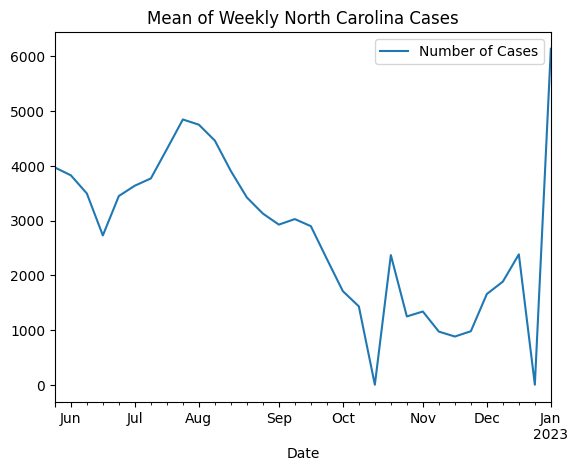

In [67]:
weekly_cases_mean_selected_state_given_range_NC.plot(x='Date', y='Number of Cases', title = 'Mean of Weekly North Carolina Cases')

In [68]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_cases_median_selected_state_NC = new_cases_selected_state_daily_NC.copy()
weekly_cases_median_selected_state_NC['Date'] = pd.to_datetime(weekly_cases_median_selected_state_NC['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_median_selected_state_NC = weekly_cases_median_selected_state_NC.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].median()
weekly_cases_median_selected_state_NC = weekly_cases_median_selected_state_NC.reset_index()
weekly_cases_median_selected_state_NC.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [69]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_median_selected_state_given_range_NC = weekly_cases_median_selected_state_NC[(weekly_cases_median_selected_state_NC["Date"] >= '2022-05-29') & (weekly_cases_median_selected_state_NC["Date"] <= '2023-01-02')]
weekly_cases_median_selected_state_given_range_NC = weekly_cases_median_selected_state_given_range_NC.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_median_selected_state_given_range_NC['Date'] = weekly_cases_median_selected_state_given_range_NC['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_median_selected_state_given_range_NC

,Date,Number of Cases
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,0.0
5,2022-07-04,0.0
6,2022-07-11,0.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Median of Weekly North Carolina Cases'}, xlabel='Date'>

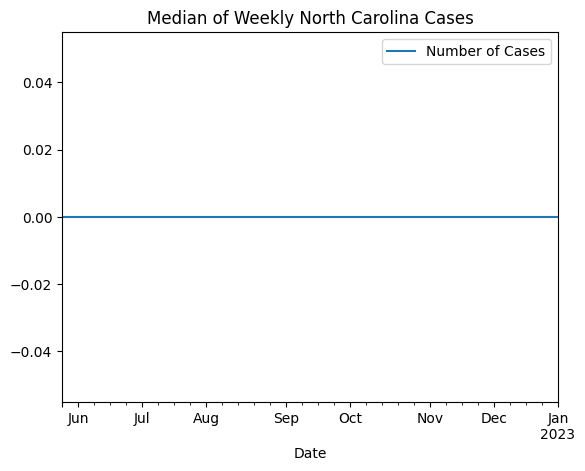

In [70]:
weekly_cases_median_selected_state_given_range_NC.plot(x='Date', y='Number of Cases', title = 'Median of Weekly North Carolina Cases')

In [71]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_cases_mode_selected_state_NC = new_cases_selected_state_daily_NC.copy()
weekly_cases_mode_selected_state_NC['Date'] = pd.to_datetime(weekly_cases_mode_selected_state_NC['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mode_selected_state_NC = weekly_cases_mode_selected_state_NC.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].apply(statistics.mode)
weekly_cases_mode_selected_state_NC = weekly_cases_mode_selected_state_NC.reset_index()
weekly_cases_mode_selected_state_NC.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [72]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mode_selected_state_given_range_NC = weekly_cases_mode_selected_state_NC[(weekly_cases_mode_selected_state_NC["Date"] >= '2022-05-29') & (weekly_cases_mode_selected_state_NC["Date"] <= '2023-01-02')]
weekly_cases_mode_selected_state_given_range_NC = weekly_cases_mode_selected_state_given_range_NC.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mode_selected_state_given_range_NC['Date'] = weekly_cases_mode_selected_state_given_range_NC['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mode_selected_state_given_range_NC

,Date,Number of Cases
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,0.0
5,2022-07-04,0.0
6,2022-07-11,0.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly North Carolina Cases'}, xlabel='Date'>

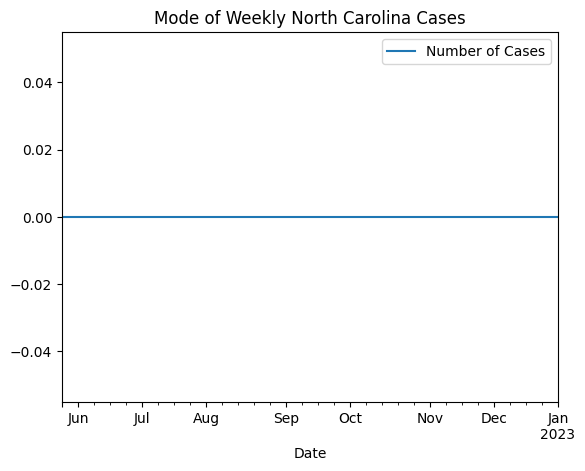

In [73]:
weekly_cases_mode_selected_state_given_range_NC.plot(x='Date', y='Number of Cases', title = 'Mode of Weekly North Carolina Cases')

In [74]:
#Converting the daily to weekly analysis and finding the weekly sum of cases.
weekly_cases_sum_selected_state_NC = new_cases_selected_state_daily_NC.copy()
weekly_cases_sum_selected_state_NC['Date'] = pd.to_datetime(weekly_cases_sum_selected_state_NC['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_sum_selected_state_NC = weekly_cases_sum_selected_state_NC.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_sum_selected_state_NC = weekly_cases_sum_selected_state_NC.reset_index()
weekly_cases_sum_selected_state_NC.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [75]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_cases_sum_selected_state_given_range_NC = weekly_cases_sum_selected_state_NC[(weekly_cases_sum_selected_state_NC["Date"] >= '2022-05-29') & (weekly_cases_sum_selected_state_NC["Date"] <= '2023-01-02')]
weekly_cases_sum_selected_state_given_range_NC = weekly_cases_sum_selected_state_given_range_NC.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_sum_selected_state_given_range_NC['Date'] = weekly_cases_sum_selected_state_given_range_NC['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_sum_selected_state_given_range_NC

,Date,Number of Cases
0,2022-05-30,27790.0
1,2022-06-06,26790.0
2,2022-06-13,24464.0
3,2022-06-20,19098.0
4,2022-06-27,24141.0
5,2022-07-04,25462.0
6,2022-07-11,26387.0
7,2022-07-18,30131.0
8,2022-07-25,33932.0
9,2022-08-01,33265.0


<AxesSubplot: title={'center': 'Cases of Weekly North Carolina Cases'}, xlabel='Date'>

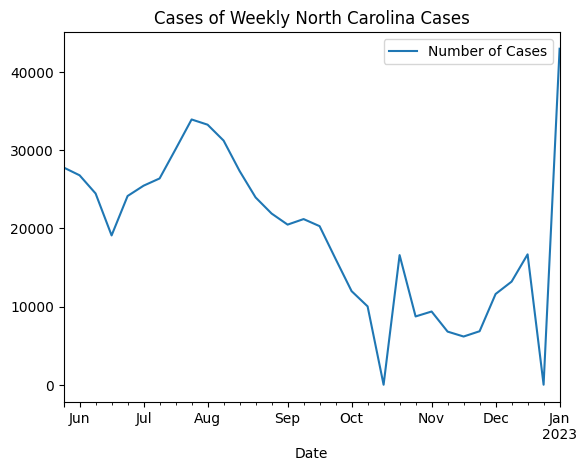

In [76]:
weekly_cases_sum_selected_state_given_range_NC.plot(x='Date', y='Number of Cases', title = 'Cases of Weekly North Carolina Cases')

### Week starting with 2023-01-02 has a peak of cases in North Carolina  with value 42982. the peak was beacuse of the new year and christmas holiday. Pepole may have gathered and had celebrations.

In [77]:
#Filtering the population for NorthCarolina state
population_selected_state_NC = population[population["State"] == selected_state_NC].reset_index()
del population_selected_state_NC[population_selected_state_NC.columns[0]]
population_selected_state_NC

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,NC,0
1,37001,Alamance County,NC,169509
2,37003,Alexander County,NC,37497
3,37005,Alleghany County,NC,11137
4,37007,Anson County,NC,24446
...,...,...,...,...
96,37191,Wayne County,NC,123131
97,37193,Wilkes County,NC,68412
98,37195,Wilson County,NC,81801
99,37197,Yadkin County,NC,37667


In [78]:
#For the Albama state summing the population.
population_selected_state_NC = population_selected_state_NC.groupby('State')['population'].sum()
population_selected_state_NC

State
NC    10488084
Name: population, dtype: int64

In [79]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_cases_sum_selected_state_given_range_NC = weekly_cases_sum_selected_state_given_range_NC.copy()
normalized_weekly_cases_sum_selected_state_given_range_NC['Number of Cases'] = normalized_weekly_cases_sum_selected_state_given_range_NC['Number of Cases'].mul(10000)
normalized_weekly_cases_sum_selected_state_given_range_NC['Number of Cases'] = normalized_weekly_cases_sum_selected_state_given_range_NC['Number of Cases'].div(10488084)
normalized_weekly_cases_sum_selected_state_given_range_NC

,Date,Number of Cases
0,2022-05-30,26.496737
1,2022-06-06,25.543274
2,2022-06-13,23.325519
3,2022-06-20,18.209236
4,2022-06-27,23.017550
5,2022-07-04,24.277075
6,2022-07-11,25.159028
7,2022-07-18,28.728794
8,2022-07-25,32.352906
9,2022-08-01,31.716947


<AxesSubplot: title={'center': 'Normalized plot of Weekly North Carolina Cases'}, xlabel='Date'>

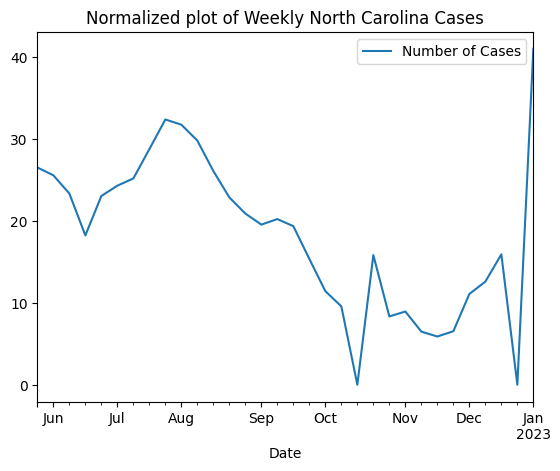

In [80]:
normalized_weekly_cases_sum_selected_state_given_range_NC.plot(x='Date', y='Number of Cases', title = 'Normalized plot of Weekly North Carolina Cases')

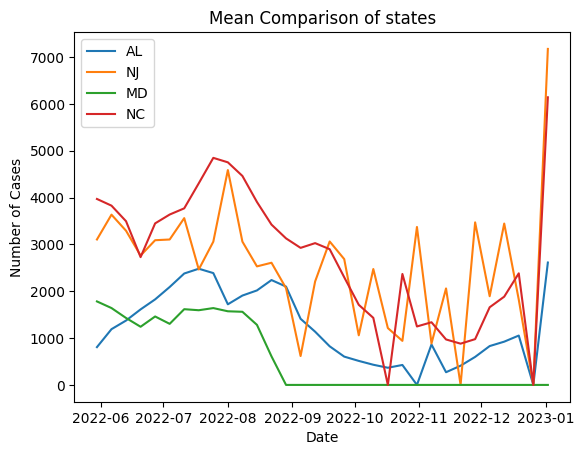

In [81]:
#Mean comparision of three states with alabama state.
plt.plot(weekly_cases_mean_selected_state_given_range['Date'], weekly_cases_mean_selected_state_given_range['Number of Cases'], label='AL')
plt.plot(weekly_cases_mean_selected_state_given_range_NJ['Date'], weekly_cases_mean_selected_state_given_range_NJ['Number of Cases'], label='NJ')
plt.plot(weekly_cases_mean_selected_state_given_range_MD['Date'], weekly_cases_mean_selected_state_given_range_MD['Number of Cases'], label='MD')
plt.plot(weekly_cases_mean_selected_state_given_range_NC['Date'], weekly_cases_mean_selected_state_given_range_NC['Number of Cases'], label='NC')
plt.title('Mean Comparison of states')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

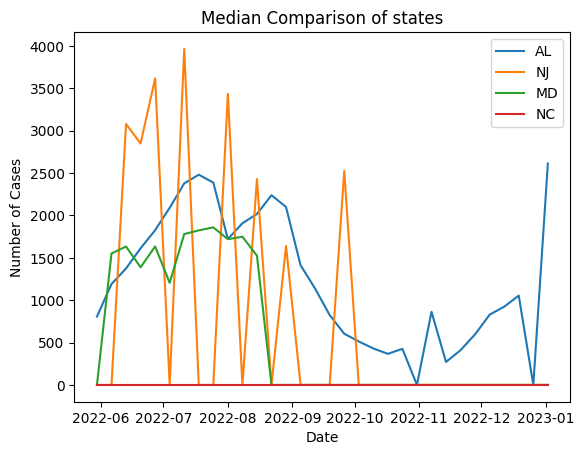

In [82]:
#Median comparision of three states with alabama state.
plt.plot(weekly_cases_median_selected_state_given_range['Date'], weekly_cases_mean_selected_state_given_range['Number of Cases'], label='AL')
plt.plot(weekly_cases_median_selected_state_given_range_NJ['Date'], weekly_cases_median_selected_state_given_range_NJ['Number of Cases'], label='NJ')
plt.plot(weekly_cases_median_selected_state_given_range_MD['Date'], weekly_cases_median_selected_state_given_range_MD['Number of Cases'], label='MD')
plt.plot(weekly_cases_median_selected_state_given_range_NC['Date'], weekly_cases_median_selected_state_given_range_NC['Number of Cases'], label='NC')
plt.title('Median Comparison of states')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

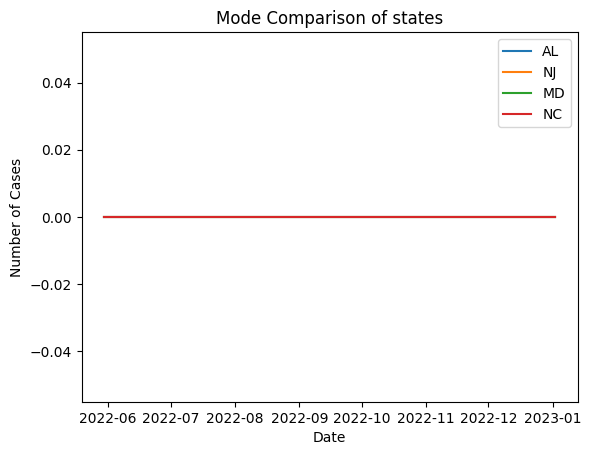

In [83]:
#Mode comparision of three states with alabama state.
plt.plot(weekly_cases_mode_selected_state_given_range['Date'], weekly_cases_mode_selected_state_given_range['Number of Cases'], label='AL')
plt.plot(weekly_cases_mode_selected_state_given_range_NJ['Date'], weekly_cases_mode_selected_state_given_range_NJ['Number of Cases'], label='NJ')
plt.plot(weekly_cases_mode_selected_state_given_range_MD['Date'], weekly_cases_mode_selected_state_given_range_MD['Number of Cases'], label='MD')
plt.plot(weekly_cases_mode_selected_state_given_range_NC['Date'], weekly_cases_mode_selected_state_given_range_NC['Number of Cases'], label='NC')
plt.title('Mode Comparison of states')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

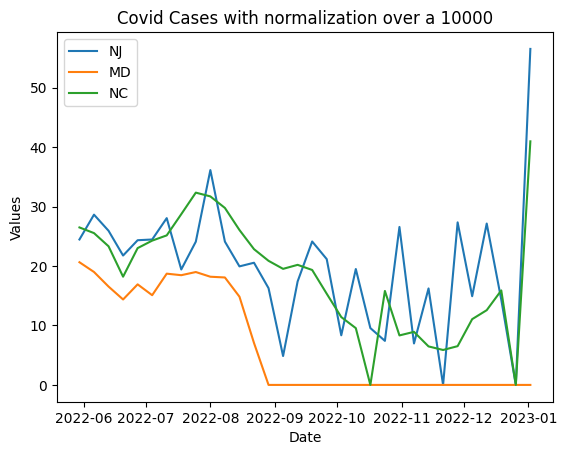

In [84]:
#Normalization plot of three states(Newjersey,Maryland,NorthCarolina).
plt.plot(normalized_weekly_cases_sum_selected_state_given_range_NJ['Date'], normalized_weekly_cases_sum_selected_state_given_range_NJ['Number of Cases'], label='NJ')
plt.plot(normalized_weekly_cases_sum_selected_state_given_range_MD['Date'], normalized_weekly_cases_sum_selected_state_given_range_MD['Number of Cases'], label='MD')
plt.plot(normalized_weekly_cases_sum_selected_state_given_range_NC['Date'], normalized_weekly_cases_sum_selected_state_given_range_NC['Number of Cases'], label='NC')
plt.title('Covid Cases with normalization over a 10000')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [85]:
#For the country summing the cases per day of all the counties.
cases_transpose = cases_transpose.groupby('Date')['Number of Cases'].sum()
cases_transpose.head()

Date
2020-01-22    723
2020-01-23    734
2020-01-24    741
2020-01-25    751
2020-01-26    759
Name: Number of Cases, dtype: int64

In [86]:
#Finding out the new cases per day.
new_cases_country_daily = cases_transpose.diff().reset_index()
new_cases_country_daily.head()

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,11.0
2,2020-01-24,7.0
3,2020-01-25,10.0
4,2020-01-26,8.0


In [87]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_cases_sum_country = new_cases_country_daily.copy()
weekly_cases_sum_country['Date'] = pd.to_datetime(weekly_cases_sum_country['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_sum_country = weekly_cases_sum_country.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_sum_country = weekly_cases_sum_country.reset_index()
weekly_cases_sum_country.head()

,Date,Number of Cases
0,2020-01-19,36.0
1,2020-01-26,-727.0
2,2020-02-02,63.0
3,2020-02-09,49.0
4,2020-02-16,102.0


In [88]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_cases_country_given_range = weekly_cases_sum_country[(weekly_cases_sum_country["Date"] >= '2022-05-29') & (weekly_cases_sum_country["Date"] <= '2023-01-02')]
weekly_cases_country_given_range = weekly_cases_country_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_country_given_range['Date'] = weekly_cases_country_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_country_given_range

,Date,Number of Cases
0,2022-05-30,596616.0
1,2022-06-06,607086.0
2,2022-06-13,720738.0
3,2022-06-20,524811.0
4,2022-06-27,715190.0
5,2022-07-04,573480.0
6,2022-07-11,752889.0
7,2022-07-18,647246.0
8,2022-07-25,789033.0
9,2022-08-01,584134.0


In [89]:
#For the country summing the population.
population_country = population['population'].sum()
population_country

328239523

In [90]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_cases_sum_country_given_range = weekly_cases_country_given_range.copy()
normalized_weekly_cases_sum_country_given_range['Number of Cases'] = normalized_weekly_cases_sum_country_given_range['Number of Cases'].mul(10000)
normalized_weekly_cases_sum_country_given_range['Number of Cases'] = normalized_weekly_cases_sum_country_given_range['Number of Cases'].div(328239523)
normalized_weekly_cases_sum_country_given_range

,Date,Number of Cases
0,2022-05-30,18.176239
1,2022-06-06,18.495213
2,2022-06-13,21.957685
3,2022-06-20,15.988660
4,2022-06-27,21.788662
5,2022-07-04,17.471388
6,2022-07-11,22.937183
7,2022-07-18,19.718710
8,2022-07-25,24.038330
9,2022-08-01,17.795968


<AxesSubplot: title={'center': 'Normalized plot of Country of Cases'}, xlabel='Date'>

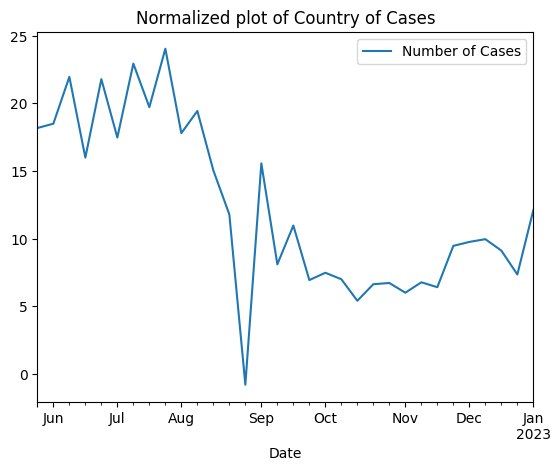

In [91]:
normalized_weekly_cases_sum_country_given_range.plot(x='Date', y='Number of Cases', title = 'Normalized plot of Country of Cases')

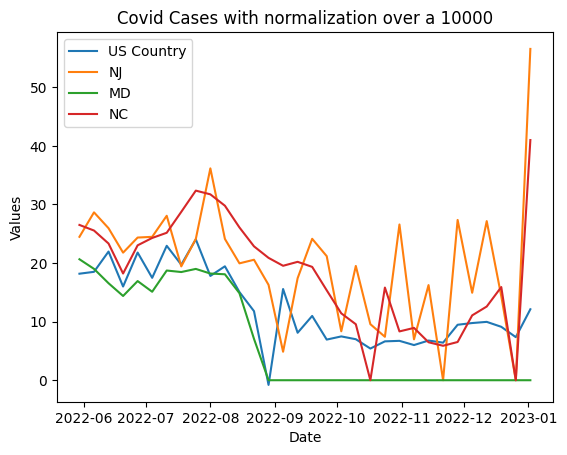

In [92]:
#Normalied Plot of US country and the three states.
plt.plot(normalized_weekly_cases_sum_country_given_range['Date'], normalized_weekly_cases_sum_country_given_range['Number of Cases'], label='US Country')
plt.plot(normalized_weekly_cases_sum_selected_state_given_range_NJ['Date'], normalized_weekly_cases_sum_selected_state_given_range_NJ['Number of Cases'], label='NJ')
plt.plot(normalized_weekly_cases_sum_selected_state_given_range_MD['Date'], normalized_weekly_cases_sum_selected_state_given_range_MD['Number of Cases'], label='MD')
plt.plot(normalized_weekly_cases_sum_selected_state_given_range_NC['Date'], normalized_weekly_cases_sum_selected_state_given_range_NC['Number of Cases'], label='NC')
plt.title('Covid Cases with normalization over a 10000')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

### Here the  two states(Newjersey(NJ)and North Carolina(NC) trends are  following the country trends but Maryland(MD) state is not following the country trends. 

### Maryland shows zero cases from september 2022 this is because of non availability of data as I researched and  found cases were not zero.

### Nj has high rate of cases compared to NC might be because of more population.